In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [343]:
raw_df = pd.read_csv('data_breast.csv')

In [344]:
raw_df.head().T

0         1         2         3         4
id                         842302    842517  84300903  84348301  84358402
diagnosis                       M         M         M         M         M
radius_mean                 17.99     20.57     19.69     11.42     20.29
texture_mean                10.38     17.77     21.25     20.38     14.34
perimeter_mean              122.8     132.9       130     77.58     135.1
area_mean                    1001      1326      1203     386.1      1297
smoothness_mean            0.1184   0.08474    0.1096    0.1425    0.1003
compactness_mean           0.2776   0.07864    0.1599    0.2839    0.1328
concavity_mean             0.3001    0.0869    0.1974    0.2414     0.198
concave points_mean        0.1471   0.07017    0.1279    0.1052    0.1043
symmetry_mean              0.2419    0.1812    0.2069    0.2597    0.1809
fractal_dimension_mean    0.07871   0.05667   0.05999   0.09744   0.05883
radius_se                   1.095    0.5435    0.7456    0.4956    0.7572
texture_se                 0.9053    0.7339    0.7869     1.156    0.7813
perimeter_se                8.589     3.398     4.585     3.445     5.438
area_se                     153.4     74.08     94.03     27.23     94.44
smoothness_se            0.006399  0.005225   0.00615   0.00911   0.01149
compactness_se            0.04904   0.01308   0.04006   0.07458   0.02461
concavity_se              0.05373    0.0186   0.03832   0.05661   0.05688
concave points_se         0.01587    0.0134   0.02058   0.01867   0.01885
symmetry_se               0.03003   0.01389    0.0225   0.05963   0.01756
fractal_dimension_se     0.006193  0.003532  0.004571  0.009208  0.005115
radius_worst                25.38     24.99     23.57     14.91     22.54
texture_worst               17.33     23.41     25.53      26.5     16.67
perimeter_worst             184.6     158.8     152.5     98.87     152.2
area_worst                   2019      1956      1709     567.7      1575
smoothness_worst           0.1622    0.1238    0.1444    0.2098    0.1374
compactness_worst          0.6656    0.1866    0.4245    0.8663     0.205
concavity_worst            0.7119    0.2416    0.4504    0.6869       0.4
concave points_worst       0.2654     0.186     0.243    0.2575    0.1625
symmetry_worst             0.4601     0.275    0.3613    0.6638    0.2364
fractal_dimension_worst    0.1189   0.08902   0.08758     0.173   0.07678
Unnamed: 32                   NaN       NaN       NaN       NaN       NaN

In [345]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Для столбца 'Unnamed: 32' полностью отсутствуют данные. Все остальные данные не содержат пропущенных значений.

In [346]:
# Целевая переменная
trg = 'diagnosis'

In [347]:
# Удалим признак 'id', т.к. он не содержит полезной для обучения информации, а также признак 'Unnamed: 32',
# с отсутствующими значениями
raw_df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [348]:
# посмотрим на распределение целевой переменной.
raw_df[trg].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Значения целевой переменной относительно сбалансированы.

In [349]:
# преобразуем значения целевой переменной из категорий в бины 
diag_bin = {'M': 1, 'B': 0}

In [350]:
raw_df[trg] = raw_df[trg].map(diag_bin)

In [352]:
raw_df.describe().T

count        mean         std         min  \
diagnosis                569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
diagnosis                  0.000000    0.000000     1.000000     1.00000  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.72000

In [969]:
mod = np.round(raw_df.iloc[:,1:], 2).mode()
print(f'Мода: \n\n{mod.T}')

Мода: 

                                 0      1     2
smoothness_mean               0.09    NaN   NaN
texture_worst                17.70  27.26   NaN
smoothness_worst              0.14    NaN   NaN
concave points_worst          0.08    NaN   NaN
radius_mean_log               2.56    NaN   NaN
texture_mean_log              2.91   2.94  3.01
area_mean_log                 6.17    NaN   NaN
compactness_mean_log         -1.88  -1.47   NaN
concavity_mean_log           -2.30    NaN   NaN
concave points_mean_log      -2.05    NaN   NaN
symmetry_mean_log            -1.30    NaN   NaN
fractal_dimension_mean_log   -1.83    NaN   NaN
radius_se_log                -1.14    NaN   NaN
texture_se_log                0.02   0.12   NaN
area_se_log                   3.03   3.15   NaN
smoothness_se_log            -2.25    NaN   NaN
compactness_se_log           -2.17    NaN   NaN
concavity_se_log             -2.12    NaN   NaN
concave points_se_log        -2.21  -2.20   NaN
symmetry_se_log              -2.

In [353]:
# Построим корреляционную матрицу
corr = raw_df.corr()
corr

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

In [ ]:
У каждого признака есть 3 подпризнака: mean, se и worst. <br>
Посмотрим отдельно на корреляцию 3 групп подпризнаков.

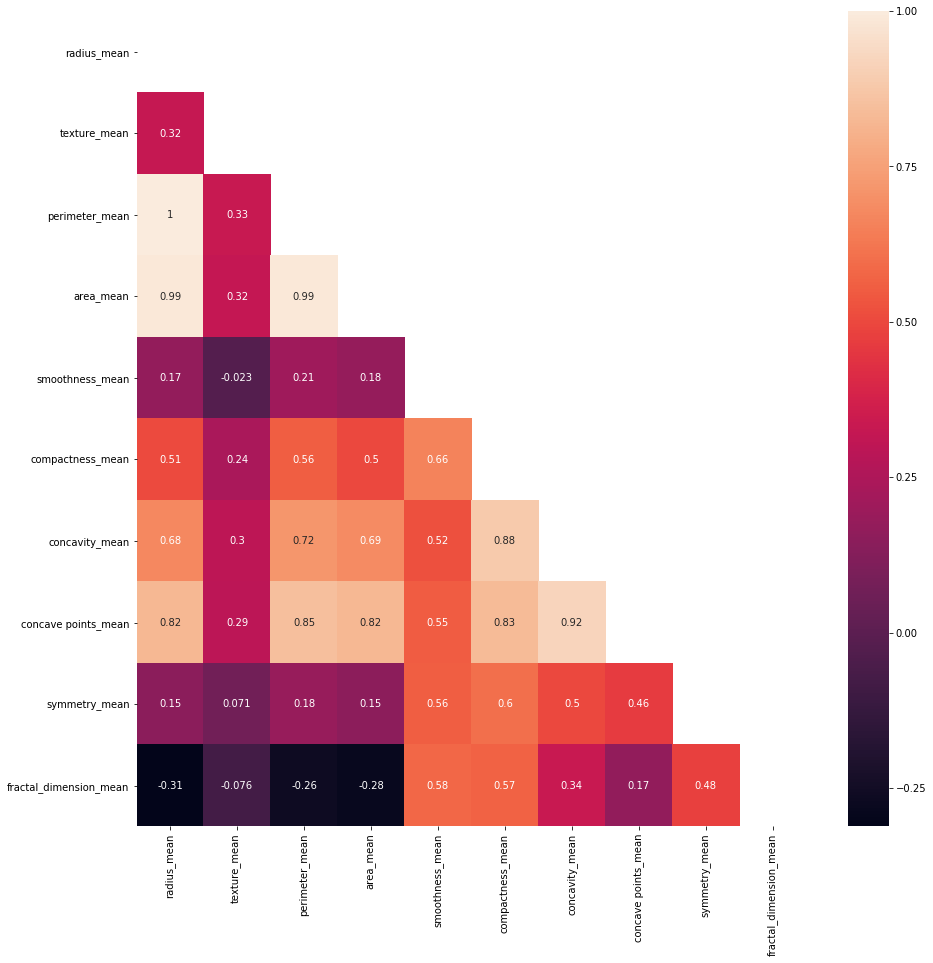

In [354]:
corr_mean = raw_df[[col for col in raw_df.columns if 'mean' in col]].corr()

plt.figure(figsize=(15,15))
mask = np.zeros_like(corr_mean)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mean, annot=True, mask=mask)

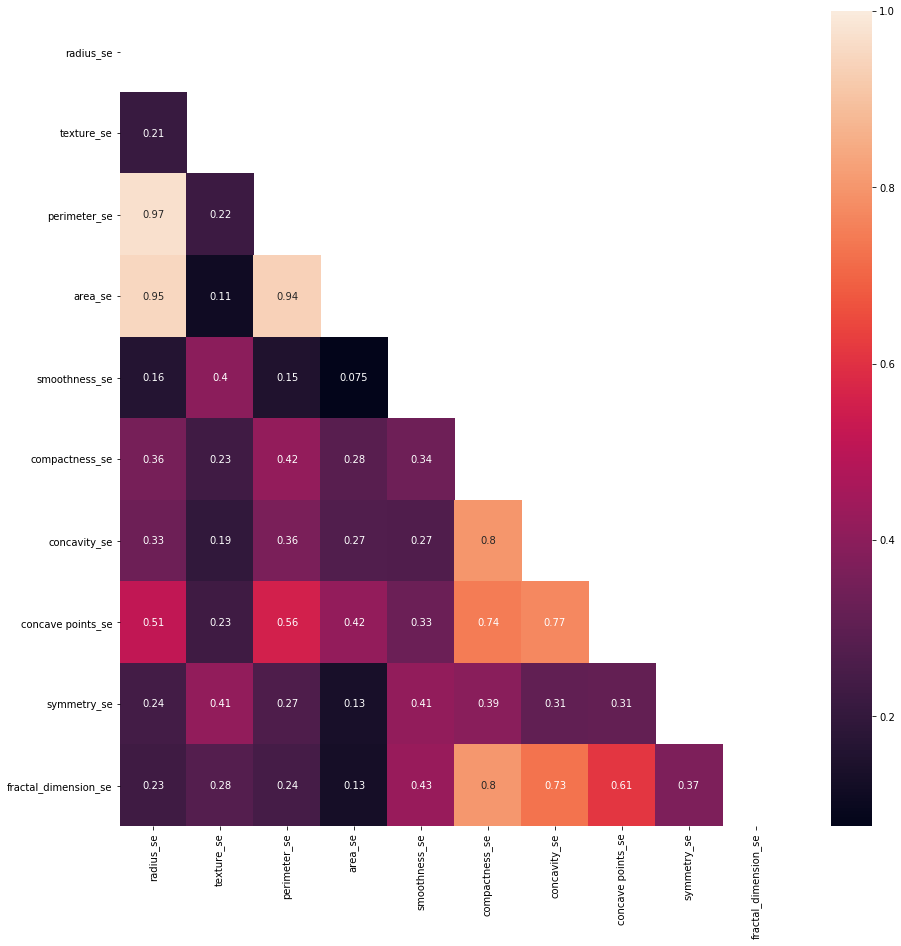

In [355]:
corr_se = raw_df[[col for col in raw_df.columns if '_se' in col]].corr()

plt.figure(figsize=(15,15))
mask = np.zeros_like(corr_se)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_se, annot=True, mask=mask)

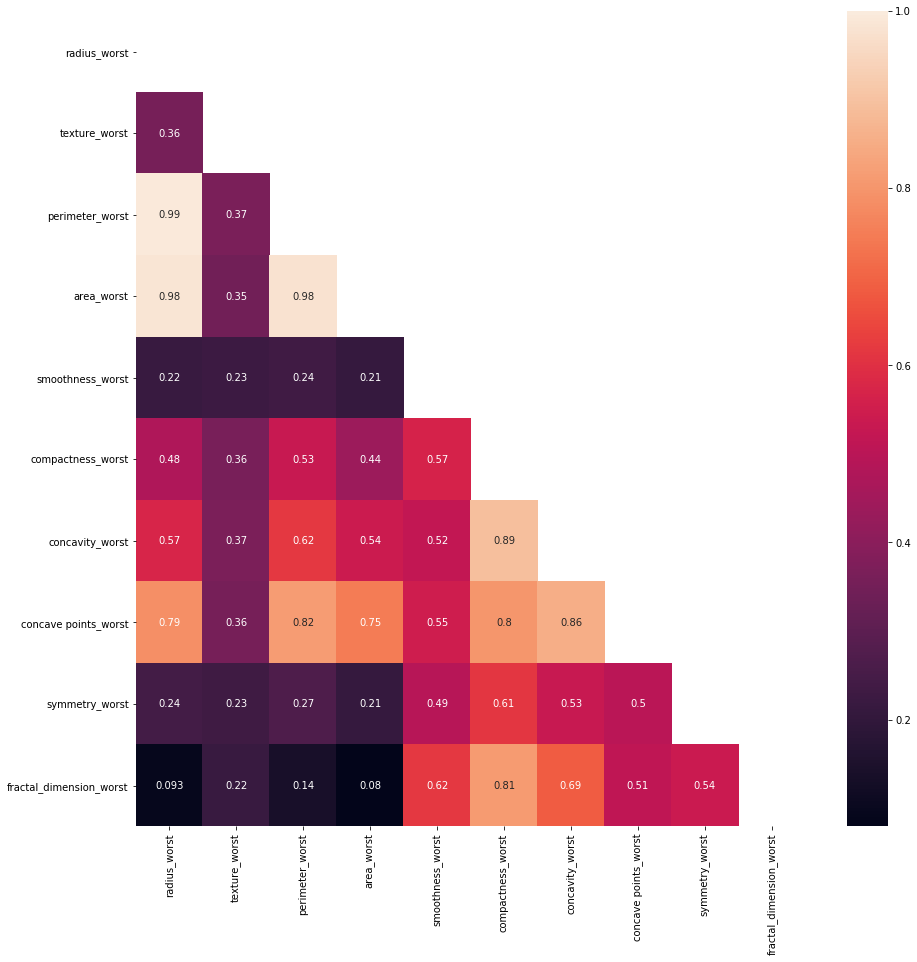

In [356]:
corr_worst = raw_df[[col for col in raw_df.columns if '_worst' in col]].corr()

plt.figure(figsize=(15,15))
mask = np.zeros_like(corr_worst)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_worst, annot=True, mask=mask)

In [357]:
# Посмотрим на наиболее коррелирующие признаки по всем 3 подпризнакам
corr_all = pd.DataFrame(data = (corr_mean.values+corr_se.values+corr_worst.values)/3,
            index = [col.replace('_mean', '') for col in corr_mean.columns], 
            columns = [col.replace('_mean', '') for col in corr_mean.columns])

In [358]:
corr_all

radius   texture  perimeter      area  smoothness  \
radius             1.000000  0.298983   0.988119  0.974401    0.183890   
texture            0.298983  1.000000   0.305934  0.259498    0.199761   
perimeter          0.988119  0.305934   1.000000  0.967247    0.198376   
area               0.974401  0.259498   0.967247  1.000000    0.153775   
smoothness         0.183890  0.199761   0.198376  0.153775    1.000000   
compactness        0.446003  0.276411   0.500889  0.407213    0.521335   
concavity          0.527699  0.288594   0.565654  0.500069    0.436397   
concave points     0.707766  0.294501   0.741188  0.662139    0.476605   
symmetry           0.210613  0.238683   0.239669  0.164849    0.488373   
fractal_dimension  0.003205  0.140803   0.040541 -0.025464    0.543263   

                   compactness  concavity  concave points  symmetry  \
radius                0.446003   0.527699        0.707766  0.210613   
texture               0.276411   0.288594        0.294501  0.238683   
perimeter             0.500889   0.565654        0.741188  0.239669   
area                  0.407213   0.500069        0.662139  0.164849   
smoothness            0.521335   0.436397        0.476605  0.488373   
compactness           1.000000   0.858883        0.792099  0.537265   
concavity             0.858883   1.000000        0.849543  0.447538   
concave points        0.792099   0.849543        1.000000  0.425935   
symmetry              0.537265   0.447538        0.425935  1.000000   
fractal_dimension     0.726364   0.583555        0.429692  0.462283   

                   fractal_dimension  
radius                      0.003205  
texture                     0.140803  
perimeter                   0.040541  
area                       -0.025464  
smoothness                  0.543263  
compactness                 0.726364  
concavity                   0.583555  
concave points              0.429692  
symmetry                    0.462283  
fractal_dimension           1.000000

In [359]:
# оставим только признаки с корреляцией > 0.9
corr_all_features = corr_all.loc[(np.abs(corr_all>0.9) & np.abs(corr_all<1)).any(axis=1), 
         (np.abs(corr_all>0.9) & np.abs(corr_all<1)).any(axis=0)]
corr_all_features

radius  perimeter      area
radius     1.000000   0.988119  0.974401
perimeter  0.988119   1.000000  0.967247
area       0.974401   0.967247  1.000000

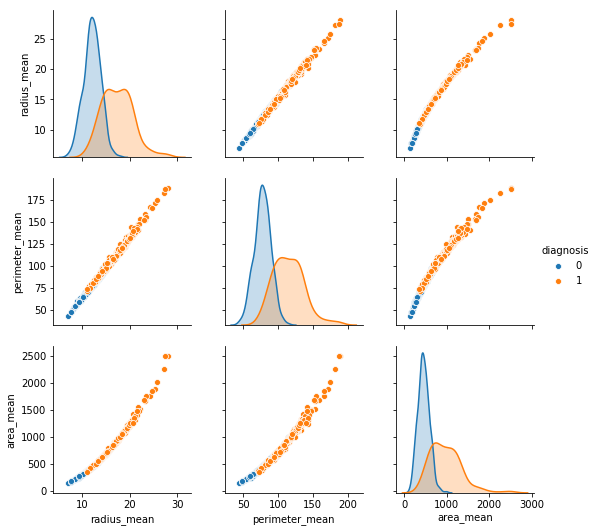

In [360]:
# посмотрим на корреляцию этих признаков на графике
sns.pairplot(raw_df, hue = 'diagnosis', vars = ('radius_mean', 'perimeter_mean', 'area_mean'))

У признаков 'radius' и 'perimeter' очень сильная линейная корреляция. 'Area' с этими признакми имеет нелинейную корреляцию.

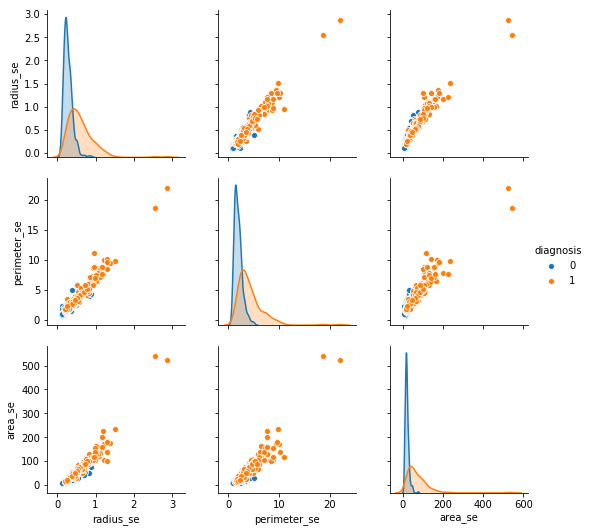

In [361]:
sns.pairplot(raw_df, hue = 'diagnosis', vars = ('radius_se', 'perimeter_se', 'area_se'))

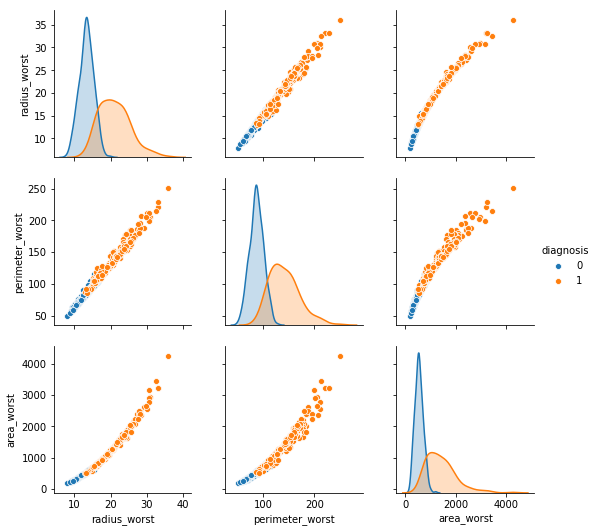

In [362]:
sns.pairplot(raw_df, hue = 'diagnosis', vars = ('radius_worst', 'perimeter_worst', 'area_worst'))

Удалим стобцы с характеристиками 'perimeter', т.к.  они сильно коррелируют с 'radius'. Т.к. корреляция 'area' с этими признаками - нелинейна, оставим этот признак.

In [ ]:
raw_df.drop([col for col in raw_df.columns if 'perimeter' in col], axis=1, inplace=True)

Визуализируем взаимосвязь остальных переменных

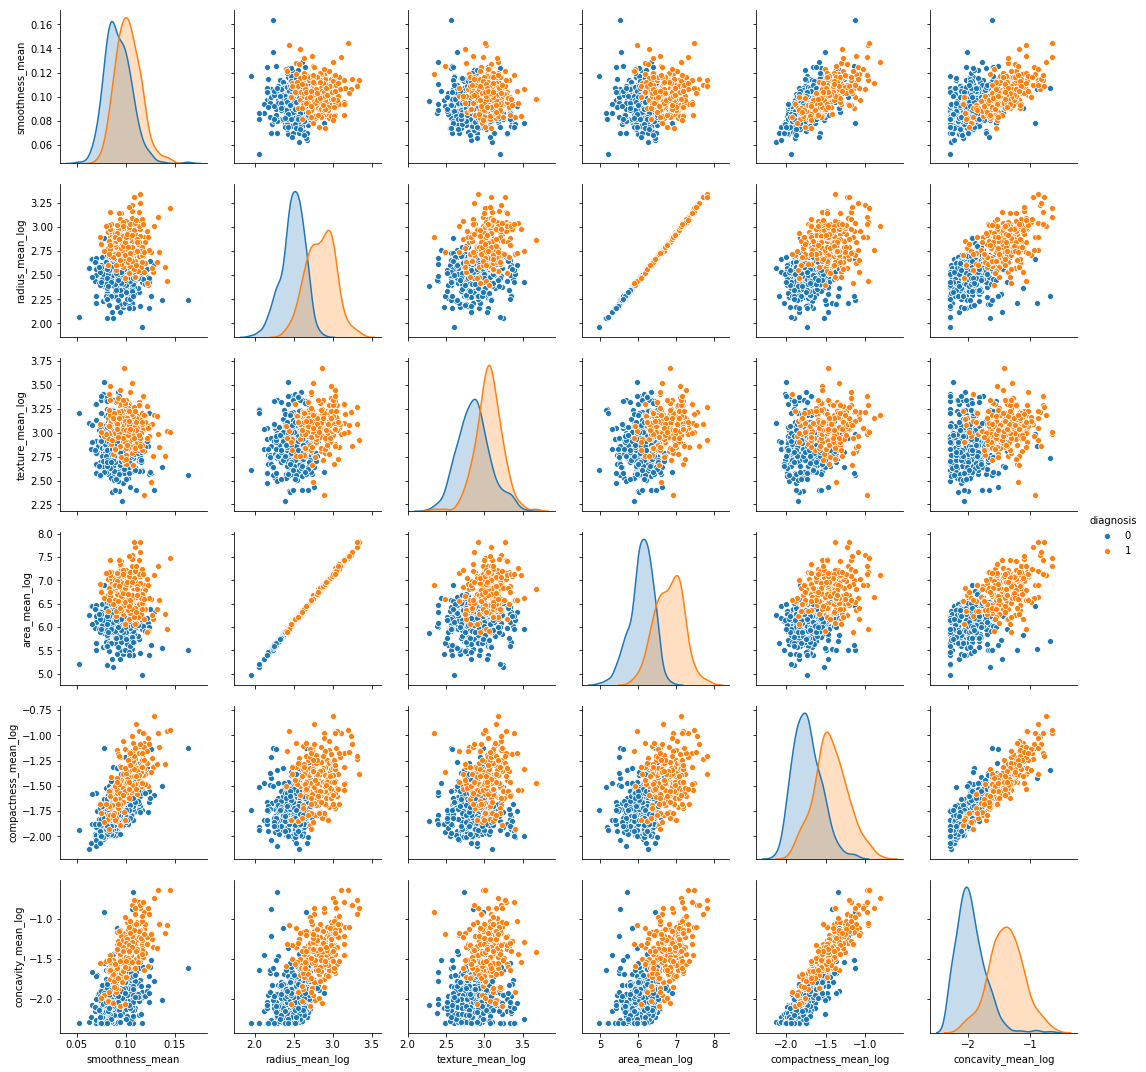

In [972]:
sns.pairplot(raw_df, hue = 'diagnosis', vars = tuple([col for col in raw_df.columns if '_mean' in col][:6]))

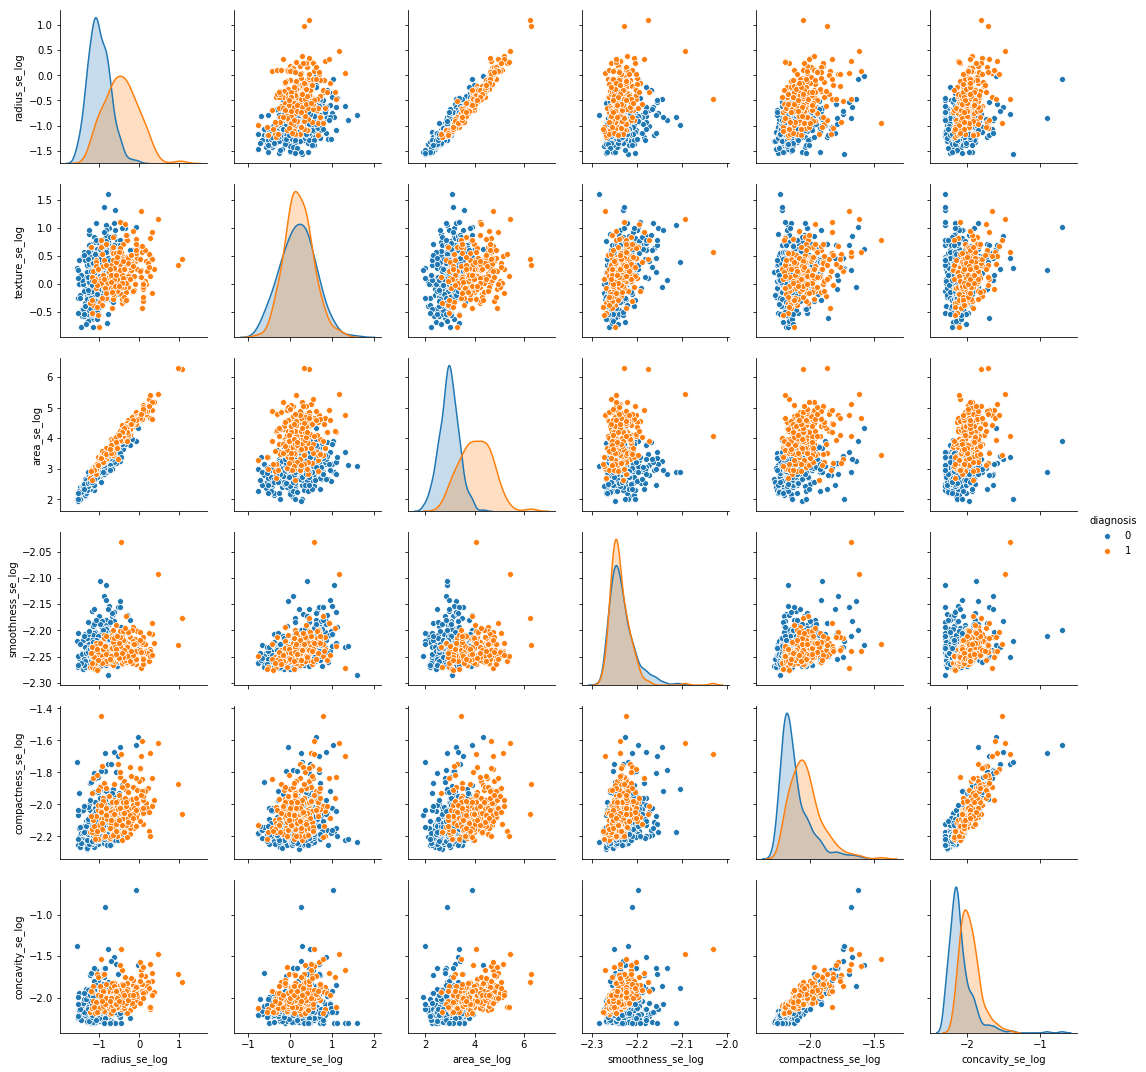

In [973]:
sns.pairplot(raw_df, hue = 'diagnosis', vars = tuple([col for col in raw_df.columns if '_se' in col])[:6])

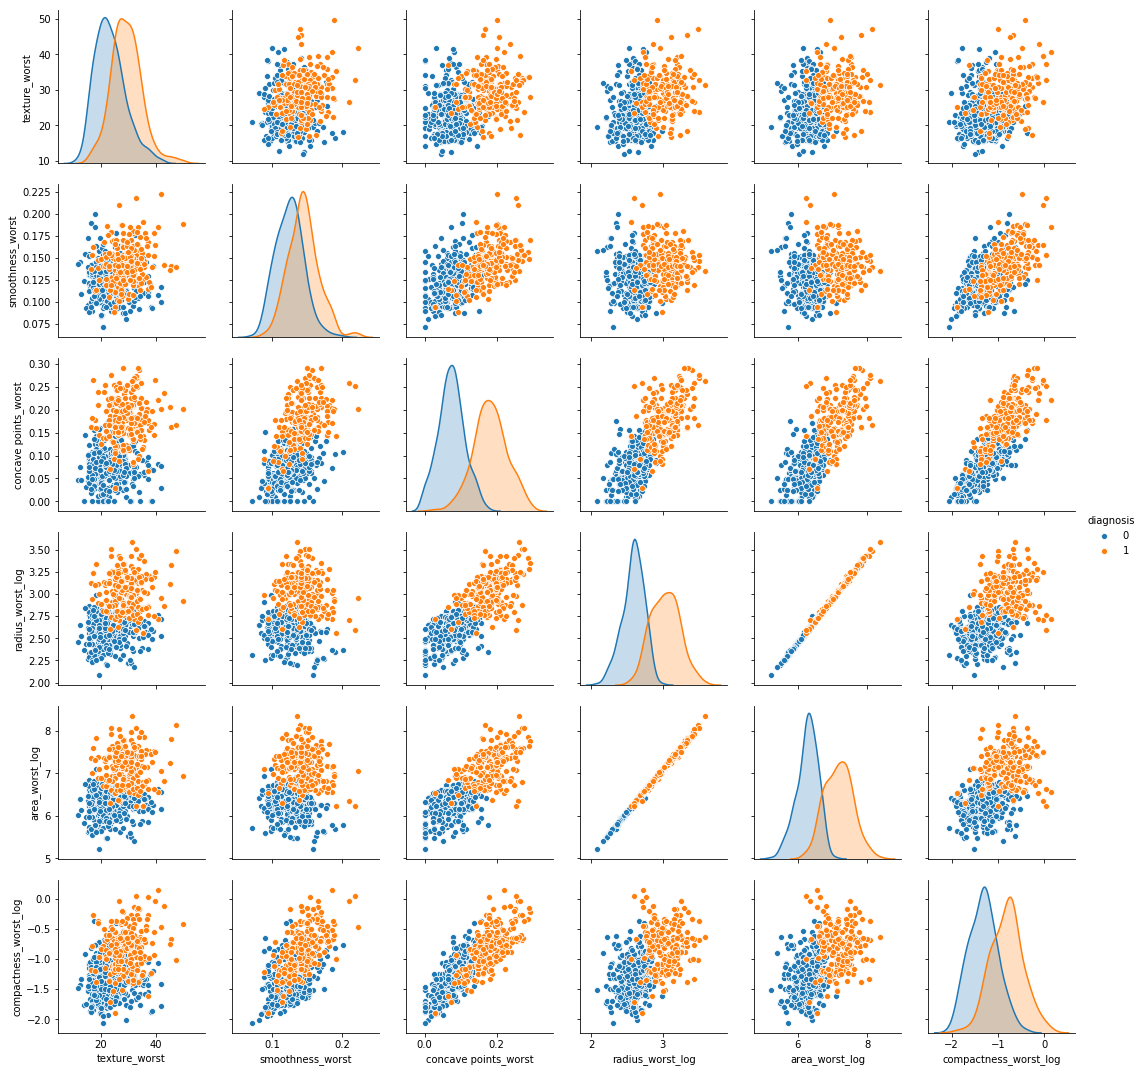

In [974]:
sns.pairplot(raw_df, hue = 'diagnosis', vars = tuple([col for col in raw_df.columns if '_worst' in col])[:6])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55434b5b38>,
      dtype=object)

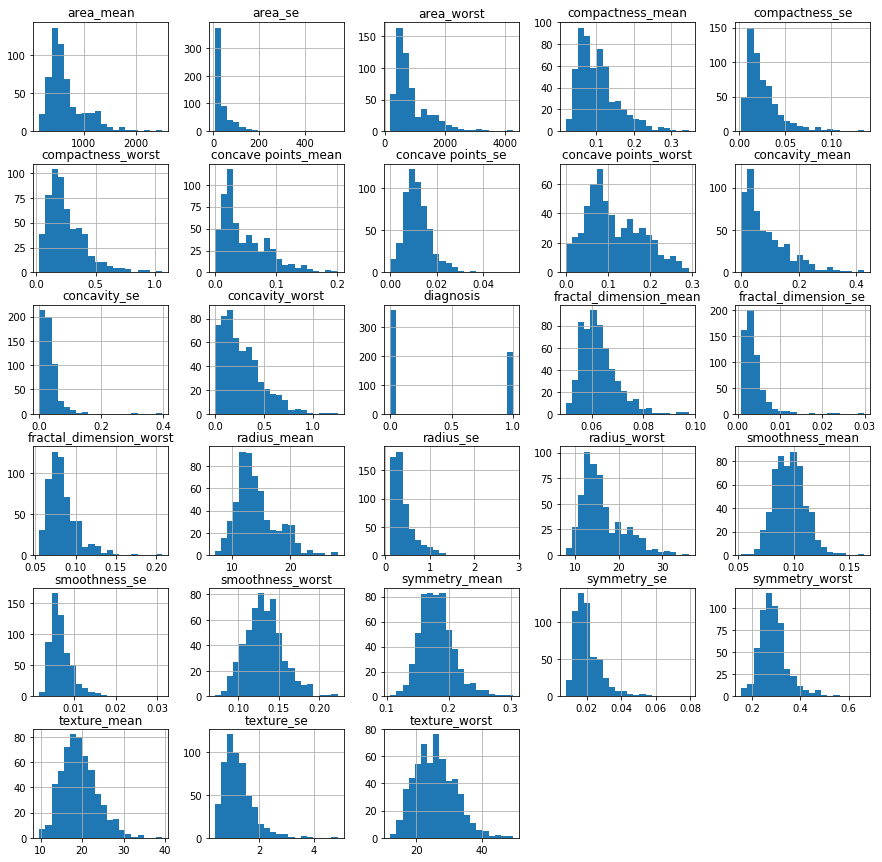

In [364]:
raw_df.hist(figsize=(15,15), bins=20)

Многие признаки имеют ассиметричное распределение. Выравняем их.

In [365]:
from scipy.stats import skew

In [366]:
skew_info = raw_df.iloc[:,1:].apply(lambda x: x.skew())
skew_info

radius_mean                0.942380
texture_mean               0.650450
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0.492616
symmetry_worst             1.433928
fractal_dimension_worst    1.662579
dtype: float64

In [367]:
skewed_cols = skew_info[abs(skew_info)>0.5].index.values
skewed_cols

array(['radius_mean', 'texture_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype=object)

In [368]:
for col in skewed_cols:
    raw_df[col+'_log'] = np.log(raw_df[col]+0.1)
raw_df.drop(skewed_cols, axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5542c20588>,
      dtype=object)

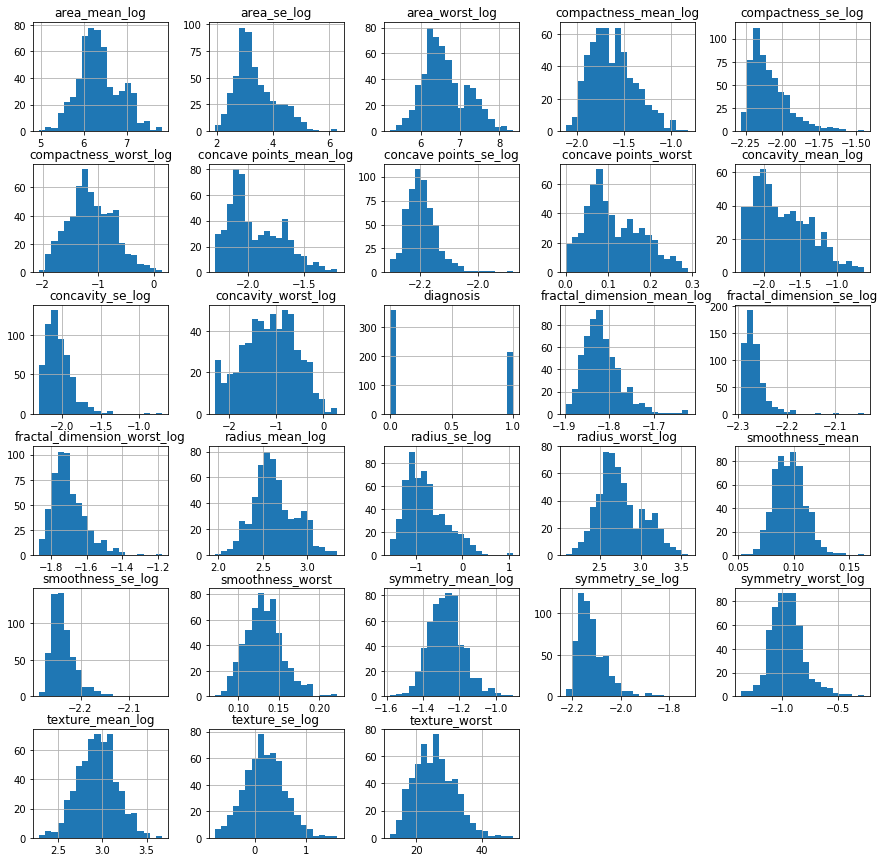

In [369]:
raw_df.hist(figsize=(15,15), bins=20)

In [370]:
skew_info = raw_df.iloc[:,1:].apply(lambda x: x.skew())
skew_info

smoothness_mean                0.456324
texture_worst                  0.498321
smoothness_worst               0.415426
concave points_worst           0.492616
radius_mean_log                0.310565
texture_mean_log              -0.010439
area_mean_log                  0.285195
compactness_mean_log           0.545590
concavity_mean_log             0.593742
concave points_mean_log        0.678581
symmetry_mean_log              0.358661
fractal_dimension_mean_log     1.109977
radius_se_log                  0.855679
texture_se_log                 0.138263
area_se_log                    0.802821
smoothness_se_log              2.054358
compactness_se_log             1.364928
concavity_se_log               1.925924
concave points_se_log          1.092403
symmetry_se_log                1.779989
fractal_dimension_se_log       3.501260
radius_worst_log               0.474082
area_worst_log                 0.456084
compactness_worst_log          0.297792
concavity_worst_log           -0.107927


In [371]:
from sklearn.model_selection import train_test_split

In [372]:
df_train, df_test = train_test_split(raw_df, test_size=0.2, stratify=raw_df[trg], random_state=42)

In [373]:
X_train = df_train.drop(trg, axis=1).values
X_test = df_test.drop(trg, axis=1).values
y_train = df_train[trg].values
y_test = df_test[trg].values

Т.к. для данного датасета наиболее опасными ошибками являются ложноотрицательные, то для определения производительности модели будем использовать полноту (recall).
Все модели будут обучаться с применением перекрестной проверки с контролем по K блокам.
Также, для определения оптимальных гиперпараметров модели будет использоваться рандомизированный, либо решетчатый поиск RandomizedSearchCV. Во избежании утечек информации масштабирование данных и выбор признаков будет осуществляться внутри перекрестной проверки.

#### Обучение с помощью RandomForestClassifier

In [377]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint, expon
from sklearn.metrics import confusion_matrix, classification_report

In [478]:
param_distribs_rfc = {
        'n_estimators': randint(low=10, high=1500),
        'max_depth': randint(low=1, high=30),
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': randint(low=1, high=5),
        'min_samples_split': randint(low=2, high=10),
        'bootstrap': [False],
        'criterion': ['gini', 'entropy'],
        }

random_search_rfc = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                param_distributions=param_distribs_rfc,
                n_iter=100, cv=10, scoring='recall', random_state=42, verbose=2)

In [479]:
random_search_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1105 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1105, total=   3.1s
[CV] bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1105 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1105, total=   3.8s
[CV] bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1105 
[CV]  bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1105, total=   3.0s
[CV] bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1105 
[CV]  bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1105, total=   3.1s
[CV] bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1105 
[CV]  bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1105, total=   3.1s
[CV] bootstrap=False, c

[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=353, total=   1.1s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=353 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=353, total=   1.1s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=353 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=353, total=   1.1s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=353 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=353, total=   1.1s
[CV] bootstrap=F

[CV]  bootstrap=False, criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=709, total=   2.1s
[CV] bootstrap=False, criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=709 
[CV]  bootstrap=False, criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=709, total=   2.0s
[CV] bootstrap=False, criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=709 
[CV]  bootstrap=False, criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=709, total=   2.0s
[CV] bootstrap=False, criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=709 
[CV]  bootstrap=False, criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=709, total=   2.0s
[CV] bootstrap=False, criterio

[CV]  bootstrap=False, criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=176, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=176 
[CV]  bootstrap=False, criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=176, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=176 
[CV]  bootstrap=False, criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=176, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=176 
[CV]  bootstrap=False, criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=176, total=   0.5s
[CV] bootstrap=False, criterio

[CV]  bootstrap=False, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=518, total=   2.0s
[CV] bootstrap=False, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=518 
[CV]  bootstrap=False, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=518, total=   2.0s
[CV] bootstrap=False, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=518 
[CV]  bootstrap=False, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=518, total=   2.0s
[CV] bootstrap=False, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=518 
[CV]  bootstrap=False, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=518, total=   1.9s
[CV] boot

[CV]  bootstrap=False, criterion=entropy, max_depth=26, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1005, total=   3.8s
[CV] bootstrap=False, criterion=entropy, max_depth=26, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1005 
[CV]  bootstrap=False, criterion=entropy, max_depth=26, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1005, total=   3.8s
[CV] bootstrap=False, criterion=entropy, max_depth=26, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1005 
[CV]  bootstrap=False, criterion=entropy, max_depth=26, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1005, total=   3.8s
[CV] bootstrap=False, criterion=entropy, max_depth=26, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1005 
[CV]  bootstrap=False, criterion=entropy, max_depth=26, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1005, total=   3.6s
[C

[CV]  bootstrap=False, criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=773, total=   2.2s
[CV] bootstrap=False, criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=773 
[CV]  bootstrap=False, criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=773, total=   2.2s
[CV] bootstrap=False, criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=773 
[CV]  bootstrap=False, criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=773, total=   2.2s
[CV] bootstrap=False, criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=773 
[CV]  bootstrap=False, criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=773, total=   2.1s
[CV] bootstrap=False, criterio

[CV]  bootstrap=False, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=1172, total=   3.2s
[CV] bootstrap=False, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=1172 
[CV]  bootstrap=False, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=1172, total=   3.1s
[CV] bootstrap=False, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=1172 
[CV]  bootstrap=False, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=1172, total=   3.1s
[CV] bootstrap=False, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=1172 
[CV]  bootstrap=False, criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=1172, total=   3.1s
[CV] bootstrap=False, c

[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=939, total=   3.5s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=939 
[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=939, total=   3.5s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=939 
[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=939, total=   3.4s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=939 
[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=939, total=   3.3s
[CV] bootstrap=F

[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1038, total=   2.7s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1038 
[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1038, total=   2.7s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1038 
[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1038, total=   2.7s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1038 
[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1038, total=   2.6s
[CV] bootstrap=False, criterio

[CV]  bootstrap=False, criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=1274, total=   3.4s
[CV] bootstrap=False, criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=1274 
[CV]  bootstrap=False, criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=1274, total=   3.4s
[CV] bootstrap=False, criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=1274 
[CV]  bootstrap=False, criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=1274, total=   3.4s
[CV] bootstrap=False, criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=1274 
[CV]  bootstrap=False, criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=1274, total=   3.3s
[CV] bootstrap=False, c

[CV]  bootstrap=False, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=1276, total=   4.8s
[CV] bootstrap=False, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=1276 
[CV]  bootstrap=False, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=1276, total=   4.8s
[CV] bootstrap=False, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=1276 
[CV]  bootstrap=False, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=1276, total=   4.8s
[CV] bootstrap=False, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=1276 
[CV]  bootstrap=False, criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=1276, total=   4.5s
[C

[CV]  bootstrap=False, criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=1381, total=   5.2s
[CV] bootstrap=False, criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=1381 
[CV]  bootstrap=False, criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=1381, total=   5.3s
[CV] bootstrap=False, criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=1381 
[CV]  bootstrap=False, criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=1381, total=   6.0s
[CV] bootstrap=False, criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=1381 
[CV]  bootstrap=False, criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=1381, total=   5.2s
[C

[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=327, total=   0.9s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=327 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=327, total=   0.9s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=327 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=327, total=   0.9s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=327 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=327, total=   0.9s
[CV] bootstrap=False, criterion=gini,

[CV]  bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=573, total=   2.4s
[CV] bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=573 
[CV]  bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=573, total=   2.3s
[CV] bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=573 
[CV]  bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=573, total=   2.3s
[CV] bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=573 
[CV]  bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=573, total=   2.3s
[CV] boot

[CV]  bootstrap=False, criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=394, total=   1.5s
[CV] bootstrap=False, criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=394 
[CV]  bootstrap=False, criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=394, total=   1.5s
[CV] bootstrap=False, criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=394 
[CV]  bootstrap=False, criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=394, total=   1.6s
[CV] bootstrap=False, criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=394 
[CV]  bootstrap=False, criterion=entropy, max_depth=23, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=394, total=   1.5s
[CV] boot

[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=207, total=   0.6s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=207 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=207, total=   0.6s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=207 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=207, total=   0.6s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=207 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=207, total=   0.6s
[CV] bootstrap=False, criterion=gini,

[CV]  bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=412, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=412 
[CV]  bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=412, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=412 
[CV]  bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=412, total=   1.3s
[CV] bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=412 
[CV]  bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=412, total=   1.3s
[CV] bootstrap=False, criterio

[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=482, total=   1.9s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=482 
[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=482, total=   1.9s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=482 
[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=482, total=   1.9s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=482 
[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=482, total=   1.9s
[CV] bootstrap=F

[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=462, total=   1.0s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=462 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=462, total=   0.9s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=462 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=462, total=   0.9s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=462 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=462, total=   0.9s
[CV] bootstrap=F

[CV]  bootstrap=False, criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=596, total=   2.2s
[CV] bootstrap=False, criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=596 
[CV]  bootstrap=False, criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=596, total=   2.2s
[CV] bootstrap=False, criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=596 
[CV]  bootstrap=False, criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=596, total=   2.2s
[CV] bootstrap=False, criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=596 
[CV]  bootstrap=False, criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=596, total=   2.2s
[CV] boot

[CV]  bootstrap=False, criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=831, total=   2.3s
[CV] bootstrap=False, criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=831 
[CV]  bootstrap=False, criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=831, total=   2.3s
[CV] bootstrap=False, criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=831 
[CV]  bootstrap=False, criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=831, total=   2.3s
[CV] bootstrap=False, criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=831 
[CV]  bootstrap=False, criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=831, total=   2.3s
[CV] bootstrap=False, criterio

[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=697, total=   1.7s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=697 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=697, total=   1.5s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=697 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=697, total=   1.5s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=697 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=697, total=   1.5s
[CV] bootstrap=False, criterion=gini,

[CV]  bootstrap=False, criterion=entropy, max_depth=27, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=807, total=   3.1s
[CV] bootstrap=False, criterion=entropy, max_depth=27, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=807 
[CV]  bootstrap=False, criterion=entropy, max_depth=27, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=807, total=   3.0s
[CV] bootstrap=False, criterion=entropy, max_depth=27, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=807 
[CV]  bootstrap=False, criterion=entropy, max_depth=27, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=807, total=   3.1s
[CV] bootstrap=False, criterion=entropy, max_depth=27, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=807 
[CV]  bootstrap=False, criterion=entropy, max_depth=27, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=807, total=   3.0s
[CV] boot

[CV]  bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1253, total=   4.8s
[CV] bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1253 
[CV]  bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1253, total=   4.8s
[CV] bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1253 
[CV]  bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1253, total=   4.8s
[CV] bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1253 
[CV]  bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1253, total=   4.8s
[C

[CV]  bootstrap=False, criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1002, total=   4.0s
[CV] bootstrap=False, criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1002 
[CV]  bootstrap=False, criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1002, total=   3.7s
[CV] bootstrap=False, criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1002 
[CV]  bootstrap=False, criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1002, total=   3.7s
[CV] bootstrap=False, criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1002 
[CV]  bootstrap=False, criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1002, total=   3.7s
[C

[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=635, total=   2.0s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=635 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=635, total=   2.0s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=635 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=635, total=   2.0s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=635 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=635, total=   2.0s
[CV] bootstrap=F

[CV]  bootstrap=False, criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=768, total=   2.1s
[CV] bootstrap=False, criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=768 
[CV]  bootstrap=False, criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=768, total=   2.1s
[CV] bootstrap=False, criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=768 
[CV]  bootstrap=False, criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=768, total=   2.1s
[CV] bootstrap=False, criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=768 
[CV]  bootstrap=False, criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=768, total=   2.1s
[CV] bootstrap=False, criterio

[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=409, total=   0.8s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=409 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=409, total=   0.9s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=409 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=409, total=   0.8s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=409 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=409, total=   0.8s
[CV] bootstrap=F

[CV]  bootstrap=False, criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=1158, total=   3.1s
[CV] bootstrap=False, criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=1158 
[CV]  bootstrap=False, criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=1158, total=   3.2s
[CV] bootstrap=False, criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=1158 
[CV]  bootstrap=False, criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=1158, total=   3.1s
[CV] bootstrap=False, criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=1158 
[CV]  bootstrap=False, criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=1158, total=   3.1s
[CV] bootstrap=False, c

[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=14, total=   0.0s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=14 
[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=14, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=14 
[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=14, total=   0.0s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=14 
[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=14, total=   0.0s
[CV] bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=666, total=   1.8s
[CV] bootstrap=False, criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=666 
[CV]  bootstrap=False, criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=666, total=   1.8s
[CV] bootstrap=False, criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=666 
[CV]  bootstrap=False, criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=666, total=   1.8s
[CV] bootstrap=False, criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=666 
[CV]  bootstrap=False, criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=666, total=   1.8s
[CV] bootstrap=False, criterio

[CV]  bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=643, total=   1.7s
[CV] bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=643 
[CV]  bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=643, total=   1.8s
[CV] bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=643 
[CV]  bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=643, total=   2.6s
[CV] bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=643 
[CV]  bootstrap=False, criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=643, total=   1.9s
[CV] bootstrap=False, criterio

[CV]  bootstrap=False, criterion=entropy, max_depth=29, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=590, total=   2.1s
[CV] bootstrap=False, criterion=entropy, max_depth=29, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=590 
[CV]  bootstrap=False, criterion=entropy, max_depth=29, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=590, total=   2.1s
[CV] bootstrap=False, criterion=entropy, max_depth=29, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=590 
[CV]  bootstrap=False, criterion=entropy, max_depth=29, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=590, total=   2.2s
[CV] bootstrap=False, criterion=entropy, max_depth=29, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=590 
[CV]  bootstrap=False, criterion=entropy, max_depth=29, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=590, total=   2.2s
[CV] boot

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 42.7min finished
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f55412bc9e8>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f55412bc4a8>, 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f55412bc470>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f55412bcd30>, 'bootstrap': [False

In [480]:
random_search_rfc.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=9, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=1373, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False)

Text(0.5, 1.0, 'Матрица неточностей для тестового набора данных')

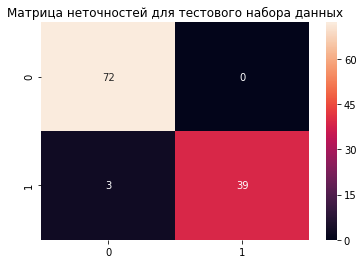

In [1274]:
sns.heatmap(confusion_matrix(y_test, random_search_rfc.predict(X_test)), 
            annot=True).set_title('Матрица неточностей для тестового набора данных')

Text(0.5, 1.0, 'Матрица неточностей для обучающего набора данных')

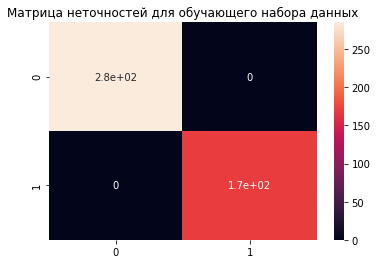

In [1275]:
sns.heatmap(confusion_matrix(y_train, random_search_rfc.predict(X_train)), 
            annot=True).set_title('Матрица неточностей для обучающего набора данных')

К сожалению, получилось переобучение.

In [483]:
print(classification_report(y_test, random_search_rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

   micro avg       0.97      0.97      0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [484]:
print(classification_report(y_train, random_search_rfc.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00       170

   micro avg       1.00      1.00      1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



Сравним полученную модель со стандартным RandomForestClassifier

In [1246]:
from sklearn.model_selection import cross_val_score

standard_rfc = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
cross_val_score(standard_rfc, X_train, y_train, scoring="recall", cv=10).mean()

0.9529411764705882

In [1247]:
cross_val_score(random_search_rfc.best_estimator_, X_train, y_train, scoring="recall", cv=10).mean()

0.9588235294117646

Как видно, производительность полученной модели при перекрестной проверке лишь немного выше стандартного RandomForestClassifier

In [485]:
from sklearn.externals import joblib

joblib.dump(random_search_rfc, 'random_search_rfc.pkl')

['random_search_rfc.pkl']

#### Обучение с помощью LogisticRegression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory

In [1084]:
def choose_imp_feat(X, y):
    '''
    Функция для нахождения наиболее важных признаков
    с помощью RandomForestClassifier.
    Возвращает индексы столбцов наиболее важных признаков.
    '''
    rfc = RandomForestClassifier(n_estimators=100, 
        random_state=42)
    # важность признаков
    feat = rfc.fit(X, y).feature_importances_
    # количество важных признаков, имеющих накопленную сумму вклада > 0.95
    num_of_imp_feat = (np.cumsum(sorted(feat)[::-1])>0.95).argmax() + 1
    # индексы столбцов наиболее важных признаков.
    idx_of_imp_feat = feat.argsort()[-num_of_imp_feat:]
    return idx_of_imp_feat

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    '''
    Трансформатор для Pipeline, отбирающий наиболее важные признаки.
    Возвращает массив с наиболее важными признаками.
    '''
    def __init__(self, choose_imp_feat):
        self.choose_imp_feat = choose_imp_feat
    def fit(self, X, y):
        self.idx_of_imp_feat = self.choose_imp_feat(X, y)
        return self
    def transform(self, X):
        return X[:, self.idx_of_imp_feat]

In [1263]:
location = './cachedir'
rmtree(location)
memory = Memory(location, verbose=10)

select_and_predict_pipeline_lr = Pipeline([
    ('feature_selection', TopFeatureSelector(choose_imp_feat)),
    ('std_scaler', StandardScaler()),
    ('lgr',  LogisticRegression(random_state=42, max_iter=300))], 
    memory=memory
)

param_distribs_lr = {
        'lgr': [LogisticRegression(random_state=42, max_iter=300)],
        'lgr__solver': ['lbfgs', 'saga', 'newton-cg'],
        'lgr__class_weight' : ['balanced'],
        'lgr__penalty': ['l2'],
        'lgr__C': expon(scale=0.05),
        'lgr__multi_class': ['ovr','multinomial'],
        'lgr__tol': [0.001, 0.01, 0.1],
        }

random_search_lr = RandomizedSearchCV(select_and_predict_pipeline_lr, param_distributions=param_distribs_lr,
                n_iter=300, cv=10, scoring='recall', random_state=42, verbose=1)

In [1264]:
random_search_lr.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TopFeatureSelector(choose_imp_feat=<function choose_imp_feat at 0x7f553e5b59d8>), array([[ 0.08455 , ..., -1.724849],
       ...,
       [ 0.1119  , ..., -1.737328]]), 
array([1, ..., 1]), None)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


________________________________________________fit_transform_one - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[-1.724849, ...,  2.948641],
       ...,
       [-1.737328, ...,  3.048799]]), 
array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TopFeatureSelector(choose_imp_feat=<function choose_imp_feat at 0x7f553e5b59d8>), array([[ 0.08206 , ..., -1.689997],
       ...,
       [ 0.1119  , ..., -1.737328]]), 
array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.2s, 0.0min
_______________________________________________________________________________

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fi

[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:  1.3min finished
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


________________________________________________fit_transform_one - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[-2.213943, ...,  2.959587],
       ...,
       [-2.137325, ...,  3.048799]]), 
array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=Pipeline(memory=Memory(location=./cachedir/joblib),
     steps=[('feature_selection', TopFeatureSelector(choose_imp_feat=<function choose_imp_feat at 0x7f553e5b59d8>)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lgr', LogisticRegression(C=1.0, class_weight=... penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=300, n_jobs=None,
          param_distributions={'lgr': [LogisticRegression(C=0.08954646421719467, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=300,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=42,
          solver='saga', tol=0.001, verbose=0, warm_st...ject at 0x7f553e2682b0>, 'lgr__multi_class': ['ovr', 'multinomial'], 'lgr__tol': [0.001, 0.01, 0.1]},
          pre_dispatch='2*n_jobs', random_state

In [1265]:
random_search_lr.best_estimator_

Pipeline(memory=Memory(location=./cachedir/joblib),
     steps=[('feature_selection', TopFeatureSelector(choose_imp_feat=<function choose_imp_feat at 0x7f553e5b59d8>)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lgr', LogisticRegression(C=0.08954646421719467, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=300,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=42,
          solver='saga', tol=0.001, verbose=0, warm_start=False))])

Text(0.5, 1.0, 'Матрица неточностей для тестового набора данных')

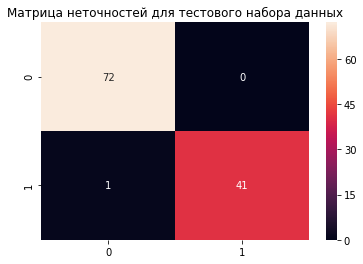

In [1277]:
sns.heatmap(confusion_matrix(y_test, random_search_lr.predict(X_test)), 
            annot=True).set_title('Матрица неточностей для тестового набора данных')

Text(0.5, 1.0, 'Матрица неточностей для обучающего набора данных')

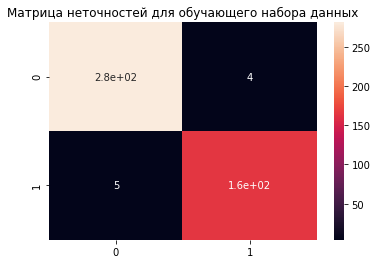

In [1279]:
sns.heatmap(confusion_matrix(y_train, random_search_lr.predict(X_train)), 
            annot=True).set_title('Матрица неточностей для обучающего набора данных')

In [1268]:
print(classification_report(y_test, random_search_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

   micro avg       0.99      0.99      0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [1269]:
print(classification_report(y_train, random_search_lr.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       285
           1       0.98      0.97      0.97       170

   micro avg       0.98      0.98      0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



Точность на обучающих и тестовых данных практически равна. Переобучения нет.

#### Обучение с помощью метода опорных векторов

In [545]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [1281]:
rmtree(location)

select_and_predict_pipeline_svc = Pipeline([
    ('feature_selection', TopFeatureSelector(choose_imp_feat)),
    ('std_scaler', StandardScaler()),
    ('svc',  SVC(random_state=42))], 
    memory=memory
)

param_grid_svc = {
        'svc': [SVC(random_state=42)],
        'svc__kernel': ['rbf'],
        'svc__C': [0.1, 1, 10, 100],
        'svc__gamma': [1, 0.1, 0.01, 0.001],
        }

grid_search_svc = GridSearchCV(select_and_predict_pipeline_svc, param_grid=param_grid_svc, scoring='f1', 
                cv=10, verbose=2)

In [1282]:
grid_search_svc.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] svc=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False), svc__C=0.1, svc__gamma=1, svc__kernel=rbf 
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TopFeatureSelector(choose_imp_feat=<function choose_imp_feat at 0x7f553e5b59d8>), array([[ 0.08455 , ..., -1.724849],
       ...,
       [ 0.1119  , ..., -1.737328]]), 
array([1, ..., 1]), None)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


________________________________________________fit_transform_one - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[-1.724849, ...,  2.948641],
       ...,
       [-1.737328, ...,  3.048799]]), 
array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[CV]  svc=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False), svc__C=0.1, svc__gamma=1, svc__kernel=rbf, total=   0.3s
[CV] svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.00

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


________________________________________________fit_transform_one - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[-2.213943, ..., -2.015678],
       ...,
       [-2.137325, ..., -1.612743]]), 
array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[CV]  svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=0.1, svc__gamma=1, svc__kernel=rbf, total=   0.3s
[CV] svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


________________________________________________fit_transform_one - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[-1.791619, ...,  2.959587],
       ...,
       [-1.581823, ...,  3.048799]]), 
array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[CV]  svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=0.1, svc__gamma=1, svc__kernel=rbf, total=   0.3s
[CV] svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


________________________________________________fit_transform_one - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[-2.272619, ..., -2.015678],
       ...,
       [-2.265935, ..., -1.612743]]), 
array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[CV]  svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=0.1, svc__gamma=1, svc__kernel=rbf, total=   0.4s
[CV] svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


________________________________________________fit_transform_one - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[-2.263086, ...,  2.959587],
       ...,
       [-2.240033, ...,  3.048799]]), 
array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[CV]  svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=0.1, svc__gamma=1, svc__kernel=rbf, total=   0.3s
[CV] svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


________________________________________________fit_transform_one - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[-2.198135, ..., -2.015678],
       ...,
       [-1.930884, ..., -1.612743]]), 
array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[CV]  svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=0.1, svc__gamma=1, svc__kernel=rbf, total=   0.3s
[CV] svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


________________________________________________fit_transform_one - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[-2.272619, ...,  2.959587],
       ...,
       [-2.265935, ...,  3.048799]]), 
array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[CV]  svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=0.1, svc__gamma=1, svc__kernel=rbf, total=   0.3s
[CV] svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


________________________________________________fit_transform_one - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[0.08206 , ..., 2.959587],
       ...,
       [0.1119  , ..., 3.048799]]), array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[CV]  svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=0.1, svc__gamma=1, svc__kernel=rbf, total=   0.3s
[CV] svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), sv

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


________________________________________________fit_transform_one - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[-2.272619, ...,  2.959587],
       ...,
       [-2.265935, ...,  3.048799]]), 
array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[CV]  svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=0.1, svc__gamma=1, svc__kernel=rbf, total=   0.3s
[CV] svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


________________________________________________fit_transform_one - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[0.08206 , ..., 2.959587],
       ...,
       [0.09087 , ..., 2.598235]]), array([1, ..., 0]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[CV]  svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=0.1, svc__gamma=1, svc__kernel=rbf, total=   0.3s
[CV] svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), sv

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf, total=   0.0s
[CV] svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loade

[CV]  svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=0.1, svc__gamma=0.01, svc__kernel=rbf, total=   0.0s
[CV] svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=0.1, svc__gamma=0.01, svc__kernel=rbf 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache l

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf, total=   0.0s
[CV] svc=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cac

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  svc=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=1, svc__gamma=1, svc__kernel=rbf, total=   0.0s
[CV] svc=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=1, svc__gamma=1, svc__kernel=rbf 

[CV]  svc=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=1, svc__gamma=0.1, svc__kernel=rbf, total=   0.0s
[CV] svc=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=1, svc__gamma=0.1, svc__kernel=rbf 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s

[CV]  svc=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=1, svc__gamma=0.01, svc__kernel=rbf, total=   0.0s
[CV] svc=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=1, svc__gamma=0.001, svc__kernel=rbf 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded -

[CV]  svc=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=10, svc__gamma=1, svc__kernel=rbf, total=   0.0s
[CV] svc=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=10, svc__gamma=1, svc__kernel=rbf 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  svc=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=10, svc__gamma=0.1, svc__kernel=rbf, total=   0.0s
[CV] svc=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=10, svc__gamma=0.1, svc_

[CV]  svc=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=10, svc__gamma=0.01, svc__kernel=rbf, total=   0.0s
[CV] svc=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=10, svc__gamma=0.01, svc__kernel=rbf 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  svc=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=10, svc__gamma=0.001, svc__kernel=rbf, total=   0.0s
[CV] svc=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=10, svc__gamma=0.0

  tol=0.001, verbose=False), svc__C=100, svc__gamma=1, svc__kernel=rbf 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  svc=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=100, svc__gamma=1, svc__kernel=rbf, total=   0.0s
[CV] svc=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shri

[CV]  svc=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=100, svc__gamma=0.1, svc__kernel=rbf, total=   0.0s
[CV] svc=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=100, svc__gamma=0.1, svc__kernel=rbf 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2930f2120a86a509c0654
___________________________________fit_transform_one cache loade

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  svc=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=100, svc__gamma=0.01, svc__kernel=rbf, total=   0.0s
[CV] svc=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=100, svc__gamma=0.01, svc__kernel=rbf 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/be7a3a5f0aef156a24dfd2bdaf3119d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f3c28a6673f2

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  svc=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=100, svc__gamma=0.001, svc__kernel=rbf, total=   0.0s
[CV] svc=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False), svc__C=100, svc__gamma

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    8.0s finished
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


________________________________________________fit_transform_one - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[-2.213943, ...,  2.959587],
       ...,
       [-2.137325, ...,  3.048799]]), 
array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=Memory(location=./cachedir/joblib),
     steps=[('feature_selection', TopFeatureSelector(choose_imp_feat=<function choose_imp_feat at 0x7f553e5b59d8>)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc': [SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)], 'svc__kernel': ['rbf'], 'svc__C': [0.1, 1, 10, 100], 'svc__gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_

In [1283]:
grid_search_svc.best_estimator_

Pipeline(memory=Memory(location=./cachedir/joblib),
     steps=[('feature_selection', TopFeatureSelector(choose_imp_feat=<function choose_imp_feat at 0x7f553e5b59d8>)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])

Text(0.5, 1.0, 'Матрица неточностей для тестового набора данных')

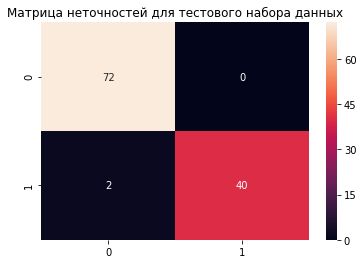

In [1289]:
sns.heatmap(confusion_matrix(y_test, grid_search_svc.predict(X_test)), 
            annot=True).set_title('Матрица неточностей для тестового набора данных')

Text(0.5, 1.0, 'Матрица неточностей для обучающего набора данных')

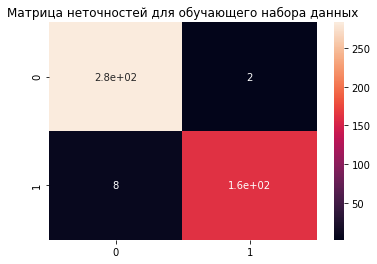

In [1290]:
sns.heatmap(confusion_matrix(y_train, grid_search_svc.predict(X_train)), 
            annot=True).set_title('Матрица неточностей для обучающего набора данных')

In [1291]:
print(classification_report(y_test, grid_search_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

   micro avg       0.98      0.98      0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [1292]:
print(classification_report(y_train, grid_search_svc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       285
           1       0.99      0.95      0.97       170

   micro avg       0.98      0.98      0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455



Результаты хуже, чем у логистической регрессии, переобучения нет.

#### Обучение с помощью метода k ближайших соседей

In [954]:
from sklearn.neighbors import KNeighborsClassifier

In [1326]:
rmtree(location)

select_and_predict_pipeline_knn = Pipeline([
    ('feature_selection', TopFeatureSelector(choose_imp_feat)),
    ('std_scaler', StandardScaler()),
    ('knn',  KNeighborsClassifier())], 
    memory=memory
)

param_grid_knn = {
        'knn': [KNeighborsClassifier()],
        'knn__weights': ['uniform', 'distance'],
        'knn__n_neighbors': list(range(1,10)),
        'knn__p': list(range(1,4)),
        }

grid_search_knn = GridSearchCV(select_and_predict_pipeline_knn, param_grid=param_grid_knn,
                cv=10, scoring='recall', verbose=2)

In [1327]:
grid_search_knn.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'), knn__n_neighbors=1, knn__p=1, knn__weights=uniform 
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TopFeatureSelector(choose_imp_feat=<function choose_imp_feat at 0x7f553e5b59d8>), array([[ 0.08455 , ..., -1.724849],
       ...,
       [ 0.1119  , ..., -1.737328]]), 
array([1, ..., 1]), None)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


________________________________________________fit_transform_one - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[-1.724849, ...,  2.948641],
       ...,
       [-1.737328, ...,  3.048799]]), 
array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'), knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.3s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=1,
           weights='uniform'), knn__n_neighbors=1, knn__p=1, knn__weights=uniform 
______________________________________

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


________________________________________________fit_transform_one - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[-2.213943, ..., -2.015678],
       ...,
       [-2.137325, ..., -1.612743]]), 
array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=1,
           weights='uniform'), knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.3s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=1,
           weights='uniform'), knn__n_neighbors=1, knn__p=1, knn__weights=uniform 
______________________________________

________________________________________________fit_transform_one - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[-2.272619, ...,  2.959587],
       ...,
       [-2.265935, ...,  3.048799]]), 
array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=1,
           weights='uniform'), knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.3s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=1,
           weights='uniform'), knn__n_neighbors=1, knn__p=1, knn__weights=uniform 
______________________________________

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=1,
           weights='distance'), knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=1,
           weights='distance'), knn__n_neighbors=1, knn__p=2, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='m

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform'), knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='distance'), knn__n_neighbors=1, knn__p=2, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='distance'), knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='distance'), knn__n_neighbors=1, knn__p=3, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='m

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=3,
           weights='uniform'), knn__n_neighbors=1, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=3,
           weights='distance'), knn__n_neighbors=1, knn__p=3, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='m

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=1,
           weights='uniform'), knn__n_neighbors=2, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=1,
           weights='uniform'), knn__n_neighbors=2, knn__p=1, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=1,
           weights='distance'), knn__n_neighbors=2, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=1,
           weights='distance'), knn__n_neighbors=2, knn__p=1, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance'), knn__n_neighbors=2, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance'), knn__n_neighbors=2, knn__p=2, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/jo

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=3,
           weights='uniform'), knn__n_neighbors=2, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=3,
           weights='uniform'), knn__n_neighbors=2, knn__p=3, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=3,
           weights='distance'), knn__n_neighbors=2, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=3,
           weights='distance'), knn__n_neighbors=2, knn__p=3, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=1,
           weights='uniform'), knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=1,
           weights='uniform'), knn__n_neighbors=3, knn__p=1, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/e456ecf29932c11817779a795beb2299
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/a660041f37bcbac1a5ae9592e284c8ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'), knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'), knn__n_neighbors=3, knn__p=2, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance'), knn__n_neighbors=3, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=3,
           weights='uniform'), knn__n_neighbors=3, knn__p=3, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/9852b56478d83d9e15fa07e05c297129
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d3ff1c4a0a35292ed8c35a58e87a909
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='min

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=3,
           weights='uniform'), knn__n_neighbors=3, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=3,
           weights='uniform'), knn__n_neighbors=3, knn__p=3, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/f4178b0fa46b932f33663707c52054b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='min

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=3,
           weights='distance'), knn__n_neighbors=3, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=3,
           weights='distance'), knn__n_neighbors=3, knn__p=3, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=1,
           weights='uniform'), knn__n_neighbors=4, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=1,
           weights='uniform'), knn__n_neighbors=4, knn__p=1, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/99aeb238ce2c24bae0cd4e5f6083b06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform'), knn__n_neighbors=4, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform'), knn__n_neighbors=4, knn__p=2, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='distance'), knn__n_neighbors=4, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='distance'), knn__n_neighbors=4, knn__p=2, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=3,
           weights='uniform'), knn__n_neighbors=4, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=3,
           weights='uniform'), knn__n_neighbors=4, knn__p=3, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=3,
           weights='distance'), knn__n_neighbors=4, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=3,
           weights='distance'), knn__n_neighbors=4, knn__p=3, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='uniform'), knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='uniform'), knn__n_neighbors=5, knn__p=1, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'), knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'), knn__n_neighbors=5, knn__p=2, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance'), knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance'), knn__n_neighbors=5, knn__p=3, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/04deda91b8d2f7c97836ae8221e0c4dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/job

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=3,
           weights='uniform'), knn__n_neighbors=5, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=3,
           weights='uniform'), knn__n_neighbors=5, knn__p=3, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=3,
           weights='distance'), knn__n_neighbors=5, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=3,
           weights='distance'), knn__n_neighbors=5, knn__p=3, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=1,
           weights='uniform'), knn__n_neighbors=6, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=1,
           weights='uniform'), knn__n_neighbors=6, knn__p=1, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform'), knn__n_neighbors=6, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform'), knn__n_neighbors=6, knn__p=2, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='distance'), knn__n_neighbors=6, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='distance'), knn__n_neighbors=6, knn__p=2, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=3,
           weights='uniform'), knn__n_neighbors=6, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=3,
           weights='uniform'), knn__n_neighbors=6, knn__p=3, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=3,
           weights='distance'), knn__n_neighbors=6, knn__p=3, knn__weights=distance, total=   0.1s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=3,
           weights='distance'), knn__n_neighbors=6, knn__p=3, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=1,
           weights='uniform'), knn__n_neighbors=7, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=1,
           weights='uniform'), knn__n_neighbors=7, knn__p=1, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform'), knn__n_neighbors=7, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform'), knn__n_neighbors=7, knn__p=2, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance'), knn__n_neighbors=7, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance'), knn__n_neighbors=7, knn__p=3, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/job

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=3,
           weights='uniform'), knn__n_neighbors=7, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=3,
           weights='uniform'), knn__n_neighbors=7, knn__p=3, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=3,
           weights='distance'), knn__n_neighbors=7, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=3,
           weights='distance'), knn__n_neighbors=7, knn__p=3, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=1,
           weights='uniform'), knn__n_neighbors=8, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=1,
           weights='uniform'), knn__n_neighbors=8, knn__p=1, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform'), knn__n_neighbors=8, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform'), knn__n_neighbors=8, knn__p=2, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c1568d0c421405e5583949d33e62e99
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='distance'), knn__n_neighbors=8, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='distance'), knn__n_neighbors=8, knn__p=2, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/50e208a054dd63e2741ee2a7cf9c235f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/47dde95ddbaad36c155644a31d5dbd3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=3,
           weights='uniform'), knn__n_neighbors=8, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=3,
           weights='uniform'), knn__n_neighbors=8, knn__p=3, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=3,
           weights='distance'), knn__n_neighbors=8, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=3,
           weights='distance'), knn__n_neighbors=8, knn__p=3, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=1,
           weights='uniform'), knn__n_neighbors=9, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=1,
           weights='uniform'), knn__n_neighbors=9, knn__p=1, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/39fb14c0d5c2d3a3024670ecd07dcd17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform'), knn__n_neighbors=9, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform'), knn__n_neighbors=9, knn__p=2, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4bef5eb24051f546b5c05efda395e15f
___________________________________fit_transform_one cache loaded - 0.0s, 0

___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='distance'), knn__n_neighbors=9, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='distance'), knn__n_neighbors=9, knn__p=2, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/4ab642bb2513fd2d258f552ba2465e5e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/fbbe2653b828bf70f40e2860f68e1c93
___________________________________fit_transform_one cache loaded - 0.0

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=3,
           weights='uniform'), knn__n_neighbors=9, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=3,
           weights='uniform'), knn__n_neighbors=9, knn__p=3, knn__weights=uniform 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b2035dfe386efb451cba73012012249b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/3505718c321e6edeef6a3110748a300f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=3,
           weights='distance'), knn__n_neighbors=9, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=3,
           weights='distance'), knn__n_neighbors=9, knn__p=3, knn__weights=distance 
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/b67374cb6fbd91468c901e8d051e79b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from ./cachedir/joblib/sklearn/pipeline/_fit_transform_one/963ba8704a0eb51058fa4690dd9c3638
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[CV]  knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  1.1min finished
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


________________________________________________fit_transform_one - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(copy=True, with_mean=True, with_std=True), array([[-2.213943, ...,  2.959587],
       ...,
       [-2.137325, ...,  3.048799]]), 
array([1, ..., 1]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=Memory(location=./cachedir/joblib),
     steps=[('feature_selection', TopFeatureSelector(choose_imp_feat=<function choose_imp_feat at 0x7f553e5b59d8>)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'knn': [KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=1,
           weights='uniform')], 'knn__weights': ['uniform', 'distance'], 'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'knn__p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=2)

In [1328]:
grid_search_knn.best_estimator_

Pipeline(memory=Memory(location=./cachedir/joblib),
     steps=[('feature_selection', TopFeatureSelector(choose_imp_feat=<function choose_imp_feat at 0x7f553e5b59d8>)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=1,
           weights='uniform'))])

Text(0.5, 1.0, 'Матрица неточностей для тестового набора данных')

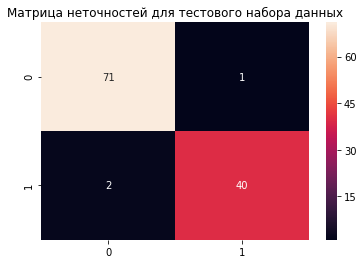

In [1329]:
sns.heatmap(confusion_matrix(y_test, grid_search_knn.predict(X_test)), 
            annot=True).set_title('Матрица неточностей для тестового набора данных')

Text(0.5, 1.0, 'Матрица неточностей для обучающего набора данных')

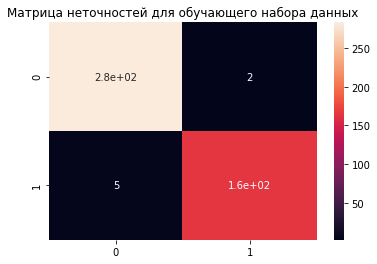

In [1330]:
sns.heatmap(confusion_matrix(y_train, grid_search_knn.predict(X_train)), 
            annot=True).set_title('Матрица неточностей для обучающего набора данных')

In [1331]:
print(classification_report(y_test, grid_search_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

   micro avg       0.98      0.98      0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [1332]:
print(classification_report(y_train, grid_search_svc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       285
           1       0.99      0.95      0.97       170

   micro avg       0.98      0.98      0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455



Результаты немного хуже, чем у логистической регрессии, переобучения нет.

Т.к. для данного датасета наиболее критичны ложноотрицательные ошибки. В идеале нужно получить модель дающую 0 ложно отрицательных ошибок. Это можно попытаться сделать с помощью настройки порога принятия решения. Для этого начертим графики зависимости полноты и точности от порога.

In [1333]:
from sklearn.metrics import precision_recall_curve

In [1334]:
y_test_prob_rfc = random_search_rfc.best_estimator_.predict_proba(X_test)[:, 1]
y_test_scores_lr = random_search_lr.best_estimator_.decision_function(X_test)
y_test_scores_svc = grid_search_svc.best_estimator_.decision_function(X_test)
y_test_prob_knn = grid_search_knn.best_estimator_.predict_proba(X_test)[:, 1]

In [1335]:
precisions_rfc, recalls_rfc, thresholds_rfc = precision_recall_curve(y_test, y_test_prob_rfc)
precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y_test, y_test_scores_lr)
precisions_svc, recalls_svc, thresholds_svc = precision_recall_curve(y_test, y_test_scores_svc)
precisions_knn, recalls_knn, thresholds_knn = precision_recall_curve(y_test, y_test_prob_knn)

In [1447]:
def plot_precision_recall_vs_threshold_prob(precisions, recalls, thresholds, model):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Точность')
    plt.plot(thresholds, recalls[:-1], 'g--', label='Полнота')
    plt.plot([0.5, 0.5], [0, 1])
    plt.xlabel('Порог')
    plt.legend(loc='center left')
    plt.ylim([0,1])
    plt.title(f'Модель: {model}')

In [1448]:
def plot_precision_recall_vs_threshold_dec(precisions, recalls, thresholds, model):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Точность')
    plt.plot(thresholds, recalls[:-1], 'g--', label='Полнота')
    plt.plot([0, 0], [0, 1])
    plt.xlabel('Порог')
    plt.legend(loc='center left')
    plt.ylim([0,1])
    plt.title(f'Модель: {model}')

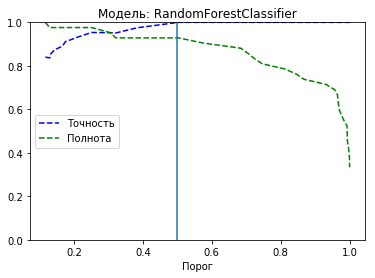

In [1449]:
plot_precision_recall_vs_threshold_prob(precisions_rfc, recalls_rfc, thresholds_rfc, 'RandomForestClassifier')

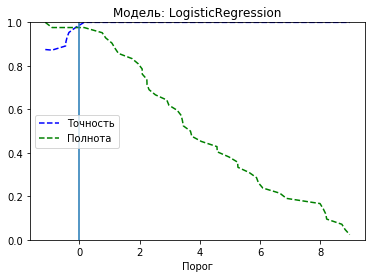

In [1450]:
plot_precision_recall_vs_threshold_dec(precisions_lr, recalls_lr, thresholds_lr, 'LogisticRegression')

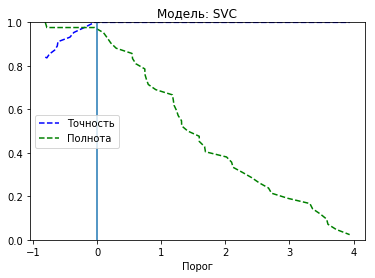

In [1451]:
plot_precision_recall_vs_threshold_dec(precisions_svc, recalls_svc, thresholds_svc, 'SVC')

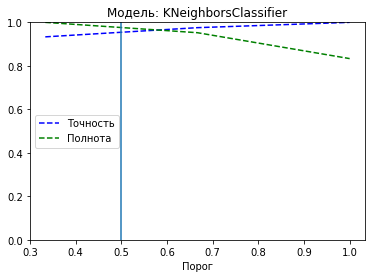

In [1452]:
plot_precision_recall_vs_threshold_prob(precisions_knn, recalls_knn, thresholds_knn, 'KNeighborsClassifier')

#### Рассмотрим модель RFC

In [1371]:
pd.DataFrame({'recall': recalls_rfc[:-1], 'precisions_rfc': precisions_rfc[:-1], 
              'thresholds_rfc': thresholds_rfc}).head(10)

recall  precisions_rfc  thresholds_rfc
0  1.000000        0.840000        0.117043
1  0.976190        0.836735        0.130007
2  0.976190        0.854167        0.132556
3  0.976190        0.872340        0.142948
4  0.976190        0.891304        0.166788
5  0.976190        0.911111        0.175528
6  0.976190        0.931818        0.210690
7  0.976190        0.953488        0.250886
8  0.952381        0.952381        0.306084
9  0.928571        0.951220        0.321559

Для получения минимального количества ложноотрицательных ошибок, придется пожертвовать большим количеством ложноположительных ошибок.

#### Рассмотрим логистическую регрессию

In [1408]:
pd.DataFrame({'recall_lr': recalls_lr[:-1], 'precisions_lr': precisions_lr[:-1], 
              'thresholds_lr': thresholds_lr}).head(10)

recall_lr  precisions_lr  thresholds_lr
0   1.000000       0.875000      -1.134197
1   0.976190       0.872340      -0.911038
2   0.976190       0.891304      -0.461921
3   0.976190       0.911111      -0.447827
4   0.976190       0.931818      -0.410616
5   0.976190       0.953488      -0.349613
6   0.976190       0.976190      -0.131551
7   0.976190       1.000000       0.154461
8   0.952381       1.000000       0.754178
9   0.928571       1.000000       0.869841

In [1412]:
idx = 0
threshold  = thresholds_lr[idx]

Text(0.5, 1.0, 'Матрица неточностей для тестового набора данных')

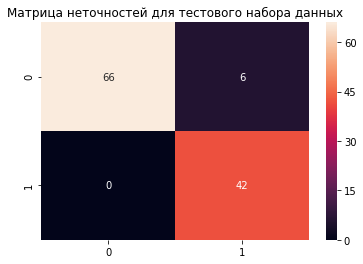

In [1427]:
sns.heatmap(confusion_matrix(y_test, 
    (random_search_lr.best_estimator_.decision_function(X_test)>(threshold-0.01))
    ), annot=True).set_title('Матрица неточностей для тестового набора данных')

Text(0.5, 1.0, 'Матрица неточностей для обучающего набора данных')

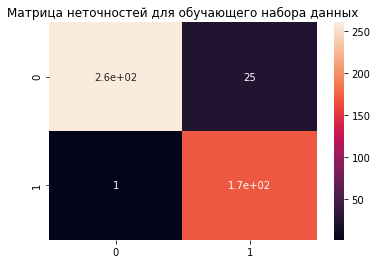

In [1428]:
sns.heatmap(confusion_matrix(y_train, 
    (random_search_lr.best_estimator_.decision_function(X_train)>(threshold-0.01))
    ), annot=True).set_title('Матрица неточностей для обучающего набора данных')

#### Рассмотрим метод k ближайших соседей

In [1430]:
pd.DataFrame({'recall_knn': recalls_knn[:-1], 'precisions_knn': precisions_knn[:-1], 
              'thresholds_knn': thresholds_knn})

recall_knn  precisions_knn  thresholds_knn
0    1.000000        0.933333        0.333333
1    0.952381        0.975610        0.666667
2    0.833333        1.000000        1.000000

In [1432]:
idx = 0
threshold  = thresholds_knn[idx]

Text(0.5, 1.0, 'Матрица неточностей для тестового набора данных')

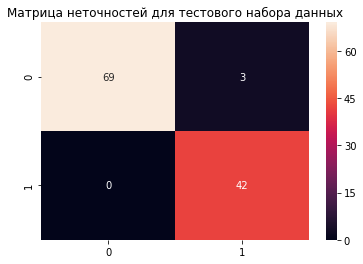

In [1445]:
sns.heatmap(confusion_matrix(y_test, 
    (grid_search_knn.best_estimator_.predict_proba(X_test)[:,1]>(threshold-0.1))
    ), annot=True).set_title('Матрица неточностей для тестового набора данных')

Text(0.5, 1.0, 'Матрица неточностей для обучающего набора данных')

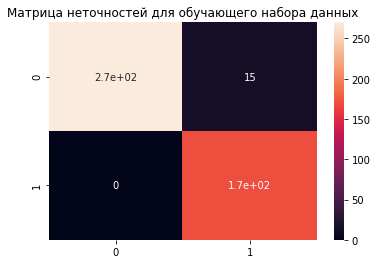

In [1446]:
sns.heatmap(confusion_matrix(y_train, 
    (grid_search_knn.best_estimator_.predict_proba(X_train)[:,1]>(threshold-0.1))
    ), annot=True).set_title('Матрица неточностей для обучающего набора данных')

Для метода k ближайших соседей получилось подобрать порог, так чтобы было 0 ложноотрицательных ошибок и не очень большое количество ложноположительных